# Building and training of the deep and optimized AutoEncoder model

In this notebook, we study how to build and fit a deep AutoEncoder with a larger size in order to predict TCR specificty. We also evaluate its general performance.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm

# Import necessary modules for pre-processing
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Import necessary modules for model building
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Concatenate

2023-06-12 23:54:24.380178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL


In [3]:
# Essential encoding and pre-processing steps
aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q","R", "S", "T", "V", "W", "Y", "-"]
label_encoder = LabelEncoder()
y_encoder =LabelEncoder()
y_encoder = y_encoder.fit(df['Amino Acids'].unique())
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = label_encoder.fit_transform(aa)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)

one_hot_status = True
col_one_hot = []
col_integer = []
y_labels = []
for k in tqdm(df.index):
    integer_encoded = label_encoder.transform(list(df.loc[k,"CDR3_al"]))
    col_integer.append(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    if one_hot_status:
        onehot_encoded = onehot_encoder.transform(integer_encoded)
        col_one_hot.append(onehot_encoded)
    y_label = y_encoder.transform([df.loc[k,"Amino Acids"]])
    y_labels.append(y_label)
    
y_labels = [int(y) for y in y_labels]
if one_hot_status:
    df["CDR3_al_one_hot"] = col_one_hot
df["CDR3_al_integer"] = col_integer
df["label"] = y_labels

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

In [4]:
# Encoding this time the v-gene and j-gene as well
v_labels = []
v_encoder = LabelEncoder()
v_encoder_one_hot = OneHotEncoder(sparse=False)
v_encoder = v_encoder.fit(df['v_gene'].unique())
v_encoder_one_hot = v_encoder_one_hot.fit(v_encoder.transform(df['v_gene'].unique()).reshape(-1,1))
for k in tqdm(df.index):
    v_label = v_encoder.transform([df.loc[k,"v_gene"]])
    v_label = v_encoder_one_hot.transform(v_label.reshape(-1,1))
    v_labels.append(v_label)
df["v_gene_one_hot"] = v_labels

j_labels = []
j_encoder = LabelEncoder()
j_encoder_one_hot = OneHotEncoder(sparse=False)
j_encoder = j_encoder.fit(df['j_gene'].unique())
j_encoder_one_hot = j_encoder_one_hot.fit(j_encoder.transform(df['j_gene'].unique()).reshape(-1,1))
for k in tqdm(df.index):
    j_label = j_encoder.transform([df.loc[k,"j_gene"]])
    j_label = j_encoder_one_hot.transform(j_label.reshape(-1,1))
    j_labels.append(j_label)
df["j_gene_one_hot"] = j_labels

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

In [5]:
# Save pre-processed dataset for later use (in particular for the web application)
df_save = df.drop_duplicates(subset=['CDR3_al'])
df_save = df_save.sample(n=1000, random_state=42)
df_save.to_csv('./models/cdr3_seqs.csv', index=False)

In [6]:
# Save encoders for later use (in particular for the web application)
import pickle
with open("./encoders/integer_encoder.pkl", "wb") as f: 
    pickle.dump(label_encoder, f)

with open("./encoders/v_gene_encoder.pkl", "wb") as f: 
    pickle.dump(v_encoder, f)

with open("./encoders/j_gene_encoder.pkl", "wb") as f: 
    pickle.dump(j_encoder, f)

with open("./encoders/v_gene_one_hot_encoder.pkl", "wb") as f: 
    pickle.dump(v_encoder_one_hot, f) 

with open("./encoders/j_gene_one_hot_encoder.pkl", "wb") as f:
    pickle.dump(j_encoder_one_hot, f)

In [7]:
# Setting the essential parameters of the model
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.2,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 10,
            "patience": 20
        }

In [8]:
# Reshaping and last pre-processing steps before training
df = df.sample(frac=1).reset_index(drop=True)
data = df[['CDR3_al_integer', 'v_gene_one_hot', 'j_gene_one_hot']]
data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
X_train = data

/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_20010/14308150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_20010/14308150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))


In [9]:
# Model building and fitting
n_inputs = 20
v_inputs = 54
j_inputs = 13
# Define encoder
cdr3_input = Input(shape=(n_inputs,), name='cdr3_input')
v_gene_input = Input(shape=(v_inputs,), name='v_gene_input')
j_gene_input = Input(shape=(j_inputs,), name='j_gene_input')
cdr3_embedding = Dense(n_inputs*2)(cdr3_input)
cdr3_embedding = BatchNormalization()(cdr3_embedding)
cdr3_embedding = ReLU()(cdr3_embedding)
v_gene_embedding = Dense(params['v_gene_embedding_dim'], name='v_gene_embedding')(v_gene_input)
j_gene_embedding = Dense(params['j_gene_embedding_dim'], name='j_gene_embedding')(j_gene_input)
merged_embedding = Concatenate(axis=1,name='merged_embedding')([cdr3_embedding, v_gene_embedding, j_gene_embedding])
encoder_dense_1 = Dense(params['dense_nodes'], activation='elu', name='encoder_dense_1')(merged_embedding)
encoder_dense_2 = Dense(params['dense_nodes'], activation='elu', name='encoder_dense_2')(encoder_dense_1)

# Latent layers / bottleneck
bottleneck = Dense(params['latent_dim'], name='bottleneck')(encoder_dense_2)

# Define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

# Output layer
output = Dense(n_inputs, activation='linear')(d)
# Define autoencoder model
model = Model([cdr3_input, v_gene_input, j_gene_input], [output])
# Compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# Compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/20


2023-06-12 23:57:14.912178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2955/2955 [==============================] - 5s 2ms/step - loss: 7.5223 - val_loss: 0.5782
Epoch 2/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.7802 - val_loss: 0.3564
Epoch 3/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.6328 - val_loss: 0.2435
Epoch 4/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.5678 - val_loss: 0.2540
Epoch 5/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.5263 - val_loss: 0.2088
Epoch 6/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.4766 - val_loss: 0.1461
Epoch 7/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.4307 - val_loss: 0.1243
Epoch 8/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.4095 - val_loss: 0.1562
Epoch 9/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.3909 - val_loss: 0.1282
Epoch 10/20
2955/2955 [==============================] - 5s 2ms/step - loss: 0.3776 - val_los

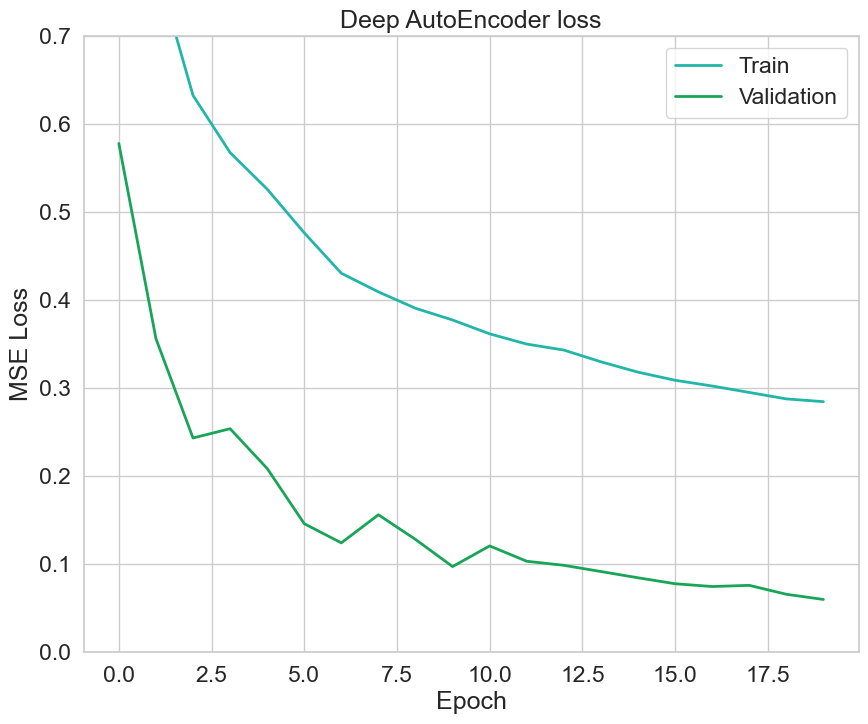

In [10]:
# Plot training & validation loss values
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5, style="whitegrid")
plt.plot(history.history['loss'], label='Train', color='#21B6A8', lw=2)
plt.plot(history.history['val_loss'], label='Validation', color='#18A558', lw=2)
plt.title('Deep AutoEncoder loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.ylim(0, 0.7)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("./images/validation_deep.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Inspect general model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 40)          160         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                           

In [12]:
# Load loss of previous simple AE model for comparison
import pickle as pkl
loss_simple_ae = pkl.load(open("./loss_ae_simple.pkl", "rb"))

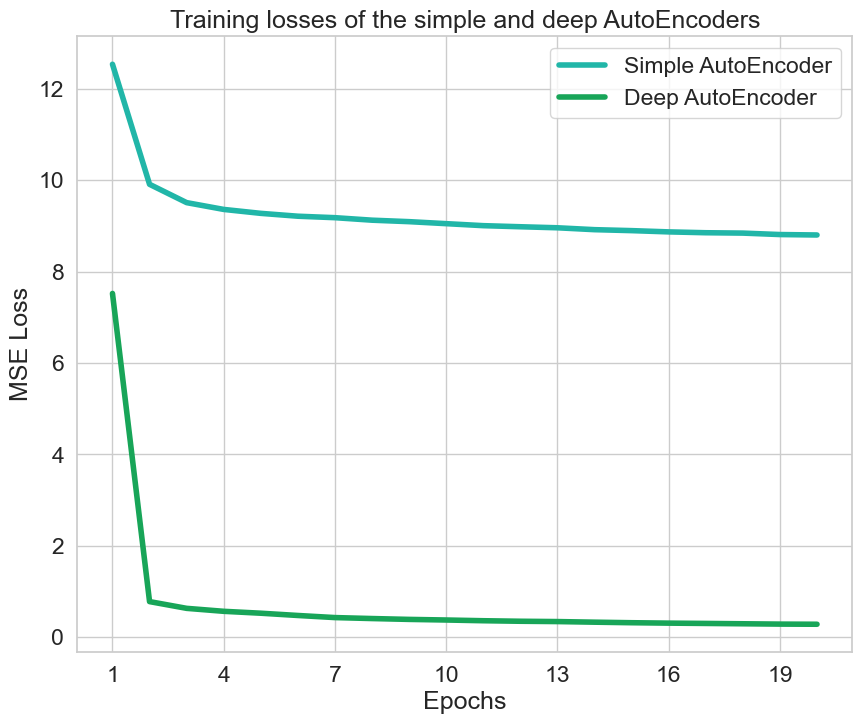

In [13]:
# Plotting the training losses of the simple and deep AutoEncoders for comparison
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5, style="whitegrid")
plt.plot(range(1,21),loss_simple_ae, label='Simple AutoEncoder', color='#21B6A8', lw=4)
plt.plot(range(1,21),history.history['loss'], label='Deep AutoEncoder', color='#18A558', lw=4)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.xticks(range(1,21,3))
plt.legend()
plt.title("Training losses of the simple and deep AutoEncoders")
plt.savefig("./images/simplevsdeep.png", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Defining the encoder part only
encoder = Model(inputs=[cdr3_input, v_gene_input, j_gene_input], outputs=bottleneck)

In [15]:
# Save full model for later use
model.save('./models/deep_ae.h5')
# Save the encoder only for later use
encoder.save('./models/deep_ae_encoder.h5')

10/10 [==============================] - 0s 802us/step


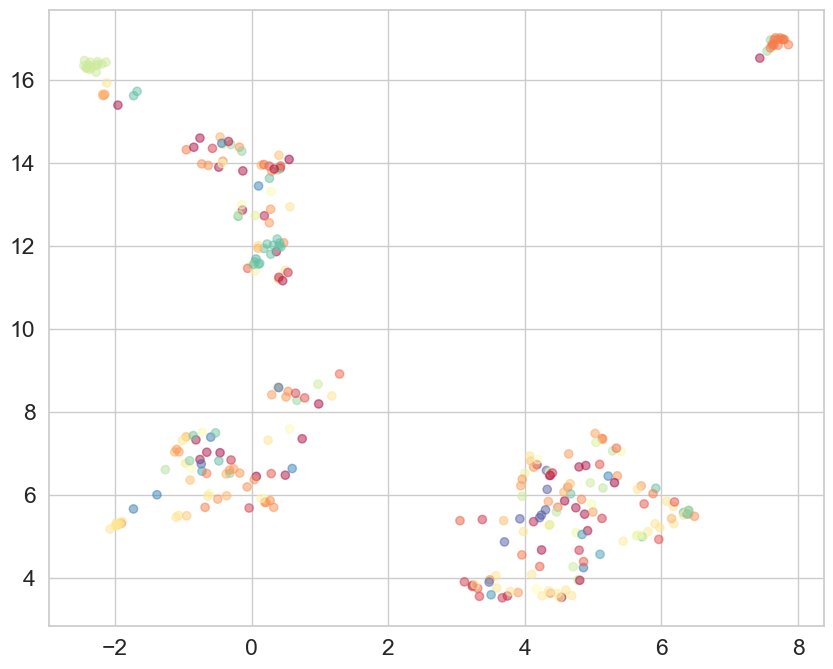

In [16]:
# Plot the latent space using different colors for the TCR specificity label
import seaborn as sns
from sklearn.decomposition import PCA
rgb_values = sns.color_palette("Spectral", df["label"].nunique())
df["label_color"] = df["label"].apply(lambda x: rgb_values[x])
N = 300
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][:N]

X_test_encode = encoder.predict(X_test)
# Umap embedding
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
#reducer = PCA(n_components=2)
principalComponents = reducer.fit_transform(X_test_encode)
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['label_color'][:N], alpha=0.5)
plt.show()

In [19]:
# Perform k-means clustering on the latent space with CV for k on Silhouetet score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import umap.umap_ as umap


values = []
for i in range(10):
    X_test = X_train.copy()
    for i in range(len(X_test)):
        X_test[i] = X_test[i][np.random.choice(X_test[i].shape[0], 1000, replace=False), :]
    X_test_encode = encoder.predict(X_test)
    reducer = umap.UMAP(random_state=42)
    X_test_encode = reducer.fit_transform(X_test_encode)
    best_k = 2
    best_score = 0
    for k in range(2, 11):
        X_train_k, X_test_k = train_test_split(X_test_encode, test_size=0.2, random_state=42)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_train_k)
        score = silhouette_score(X_test_k, kmeans.predict(X_test_k))
        print("For n_clusters = {}, silhouette score is {})".format(k, score))
        best_score = score if score > best_score else best_score
        best_k = k if score == best_score else best_k

    print("Best k = {}, best score = {}".format(best_k, best_score))

    # Perform k-means clustering on the latent space with best k
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    kmeans.fit(X_test_encode)
    labels = kmeans.predict(X_test_encode)

    # Compute silhouette score, calinski harabasz score, and davies bouldin score
    from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

    print("Silhouette score = {}".format(silhouette_score(X_test_encode, kmeans.predict(X_test_encode))))
    print("Calinski harabasz score = {}".format(calinski_harabasz_score(X_test_encode, kmeans.predict(X_test_encode))))
    print("Davies bouldin score = {}".format(davies_bouldin_score(X_test_encode, kmeans.predict(X_test_encode))))
    values.append([silhouette_score(X_test_encode, kmeans.predict(X_test_encode)), calinski_harabasz_score(X_test_encode, kmeans.predict(X_test_encode)), davies_bouldin_score(X_test_encode, kmeans.predict(X_test_encode))])

print("Silhouette score = {}".format(np.mean([v[0] for v in values])))
print("Calinski harabasz score = {}".format(np.mean([v[1] for v in values])))
print("Davies bouldin score = {}".format(np.mean([v[2] for v in values])))

32/32 [==============================] - 0s 1ms/step
For n_clusters = 2, silhouette score is 0.6796661615371704)
For n_clusters = 3, silhouette score is 0.6288902759552002)
For n_clusters = 4, silhouette score is 0.6073487997055054)
For n_clusters = 5, silhouette score is 0.5419071912765503)
For n_clusters = 6, silhouette score is 0.5603599548339844)
For n_clusters = 7, silhouette score is 0.5450190305709839)
For n_clusters = 8, silhouette score is 0.5099780559539795)
For n_clusters = 9, silhouette score is 0.5262537598609924)
For n_clusters = 10, silhouette score is 0.4716581702232361)
Best k = 2, best score = 0.6796661615371704
Silhouette score = 0.6908813714981079
Calinski harabasz score = 3371.734945167703
Davies bouldin score = 0.4302901372705786
32/32 [==============================] - 0s 838us/step
For n_clusters = 2, silhouette score is 0.5278486609458923)
For n_clusters = 3, silhouette score is 0.6639797687530518)
For n_clusters = 4, silhouette score is 0.6423683166503906)
For

  0%|          | 0/236345 [00:00<?, ?it/s]

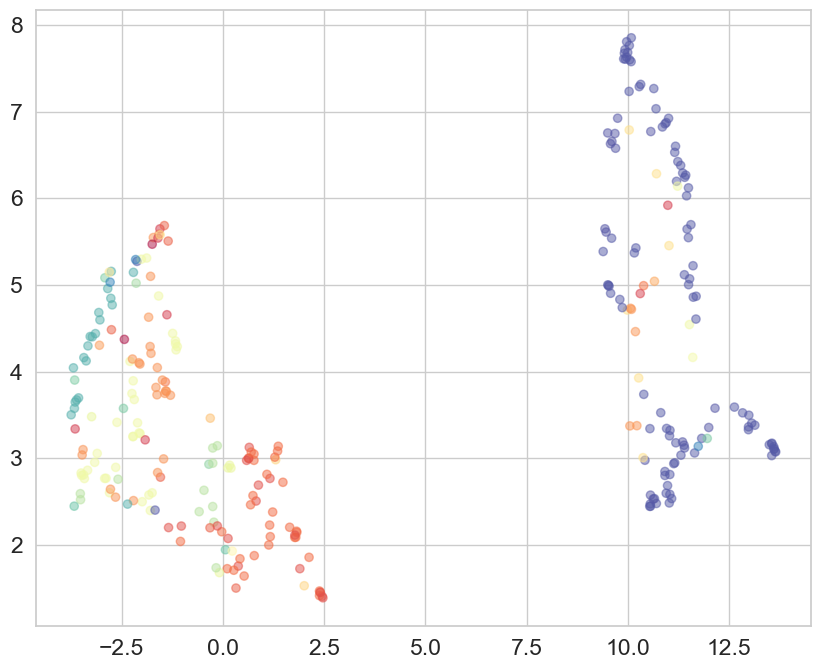

In [35]:
# Plotting the latent space with data points colored differently regarding their end of sequences
# This allows us to check the relevance of our model and be able to better interpret it
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[15:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['end_seq_color'][:N], alpha=0.5)
plt.show()

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_14571/179923512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


Accuracy:  0.5066666666666667


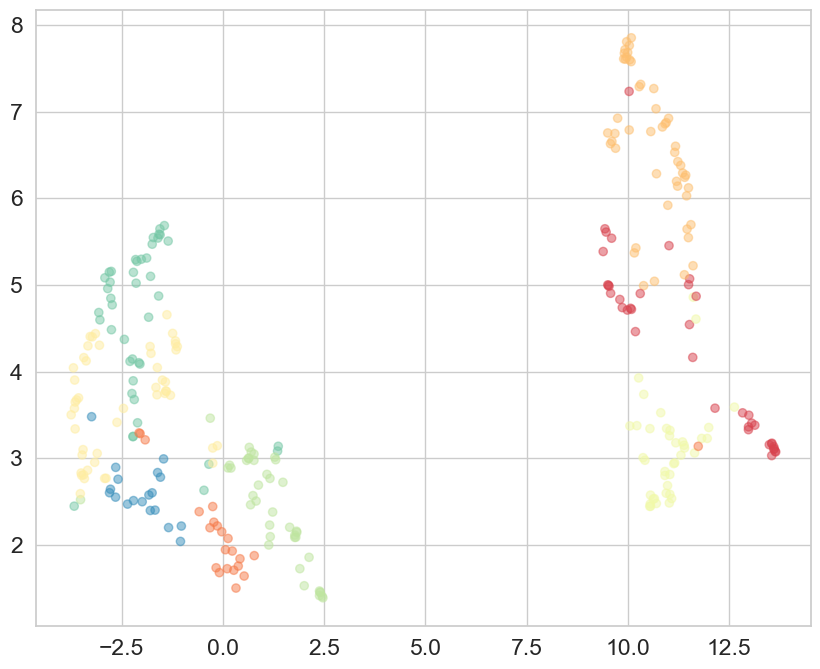

In [36]:
# Perform K-means on this latent space and plot results
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

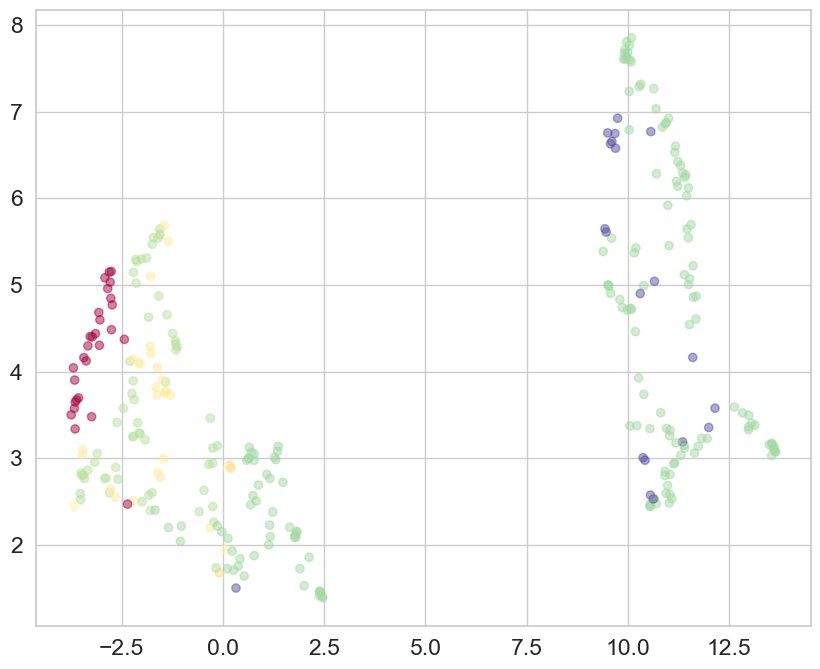

In [37]:
# Plotting again the results
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[17:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['end_seq_color'][:N], alpha=0.5)
plt.show()

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_14571/715468298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


Accuracy:  0.6633333333333333


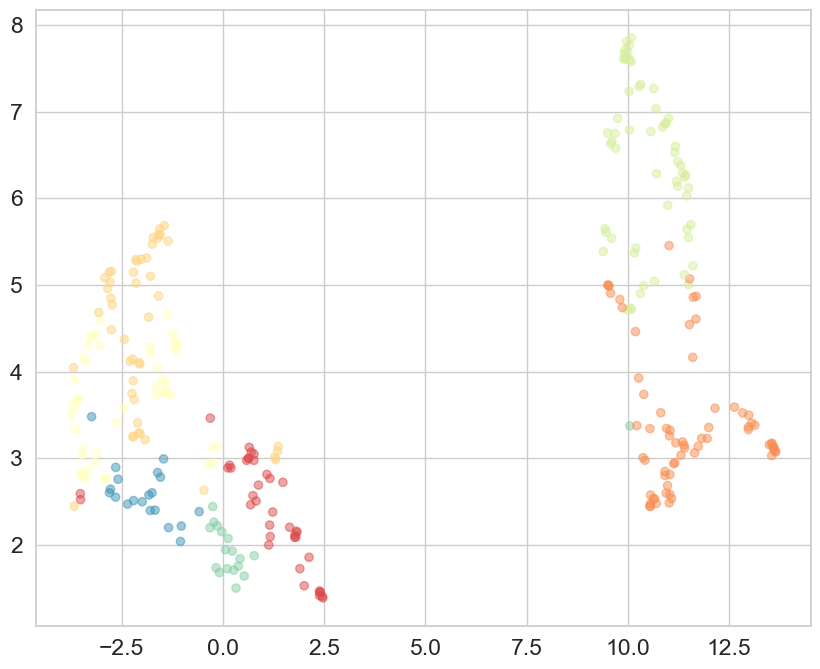

In [38]:
# Plotting using K-means labels (different k)
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

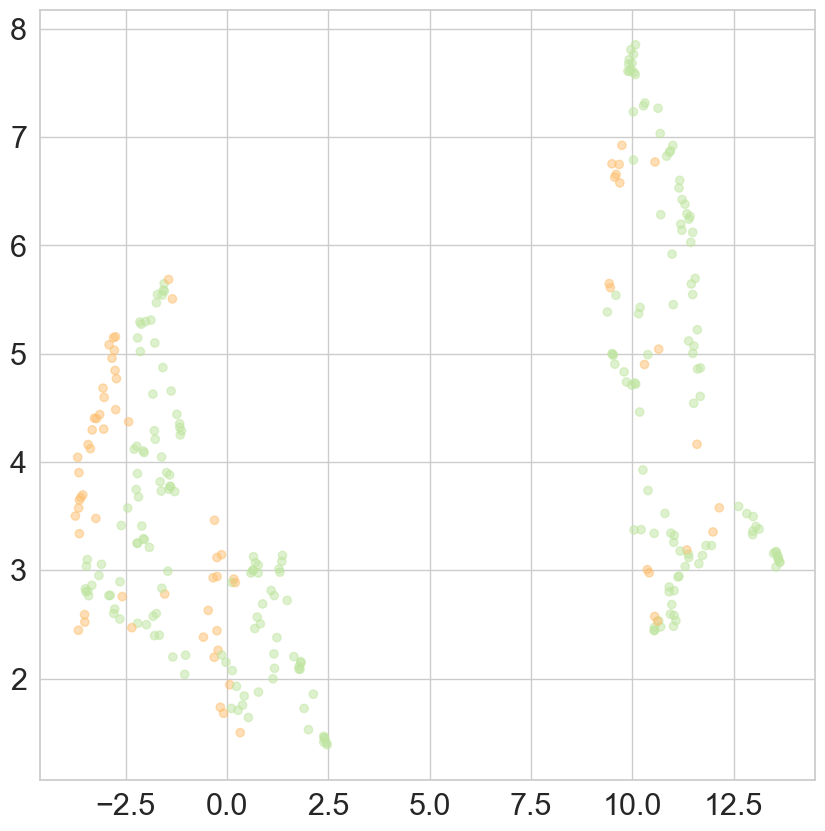

In [71]:
# Perform the same steps as before but using the j-gene label 
df["j_label"] = df["j_gene"].apply(lambda x: x.split("-")[0])
df["j_label1"] = df["j_gene"].apply(lambda x: x.split("-")[0])
j_labels = []
j_encoder = LabelEncoder()
j_encoder = j_encoder.fit(df['j_label'].unique())
for k in tqdm(df.index):
    j_label = j_encoder.transform([df.loc[k,"j_label"]])
    j_labels.append(j_label)
j_labels = [int(y) for y in j_labels]
df["j_label"] = j_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["j_label"].nunique())
df["j_color"] = df["j_label"].apply(lambda x: rgb_values[x])



plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['j_color'][:N], alpha=0.5)
plt.show()

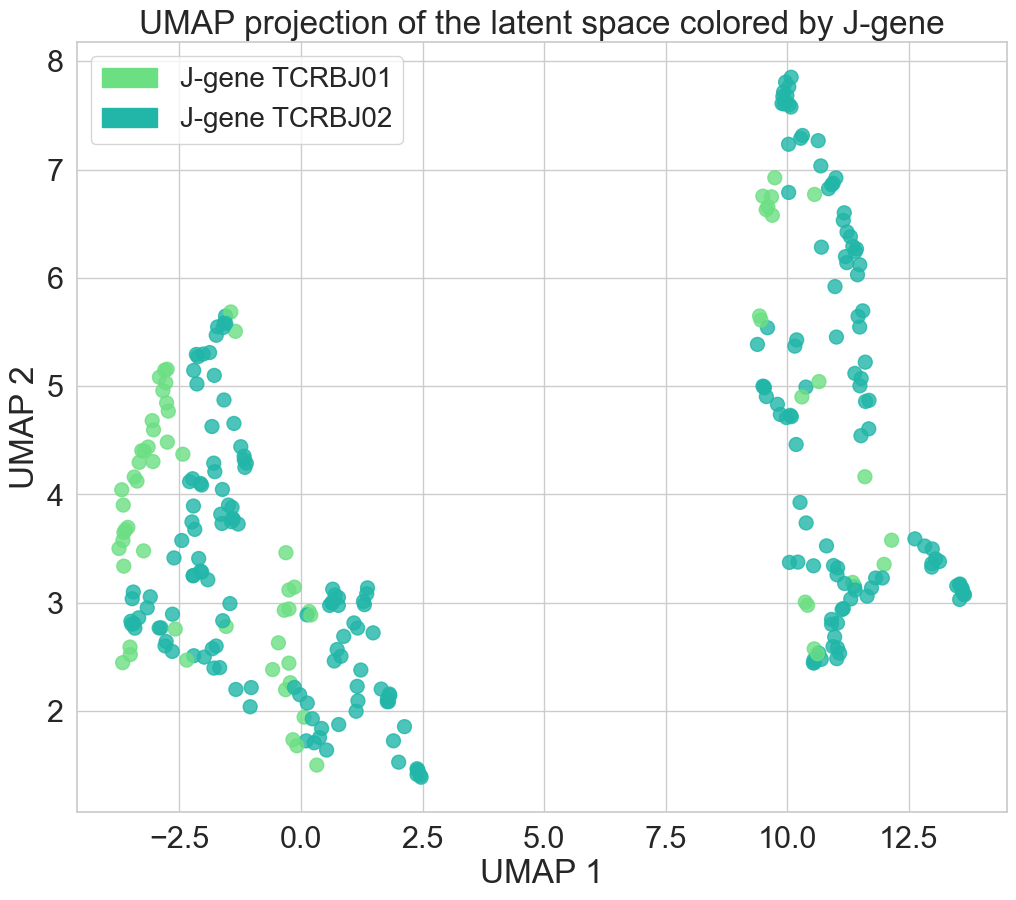

In [75]:
from matplotlib import cm
import matplotlib
cmap = cm.get_cmap('BuGn', len(data))
colors = [ "#6cdf83", "#21B6A8"]
my_cmap = matplotlib.colors.ListedColormap(colors, name = 'custom_cmap')

sns.set(rc={'figure.figsize':(10,10)}, font_scale=2, style="whitegrid")
plt.figure(figsize=(12, 10))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=df['j_label'][:N], cmap=my_cmap, alpha=0.8, s=100)
plt.title("UMAP projection of the latent space colored by J-gene")
plt.legend(loc='upper left', fontsize=20, handles=[matplotlib.patches.Patch(color=colors[i], label=f"J-gene {df['j_label1'].unique()[i]}") for i in range(len(df['j_label1'].unique()))])
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.savefig("./images/AE_deep_j_gene.png", dpi=300, bbox_inches='tight')
plt.show()

Accuracy:  0.7666666666666667


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_14571/2372497129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['j_kmeans_label'] = kmeans.labels_


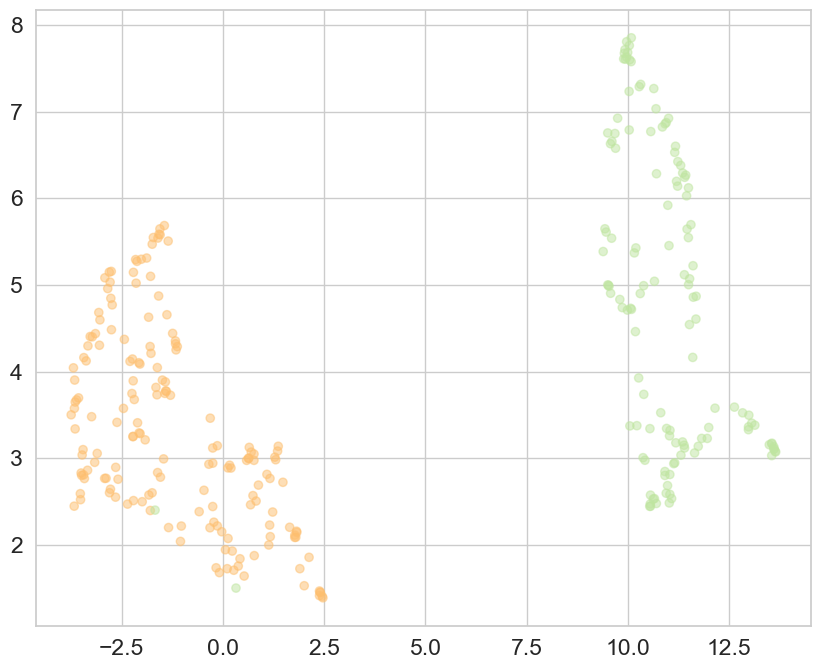

In [49]:
from sklearn.cluster import KMeans
k = 2 # 8 is highest accuracy
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['j_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['j_kmeans_label'] == cluster]['j_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['j_kmeans_label'], sample['j_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

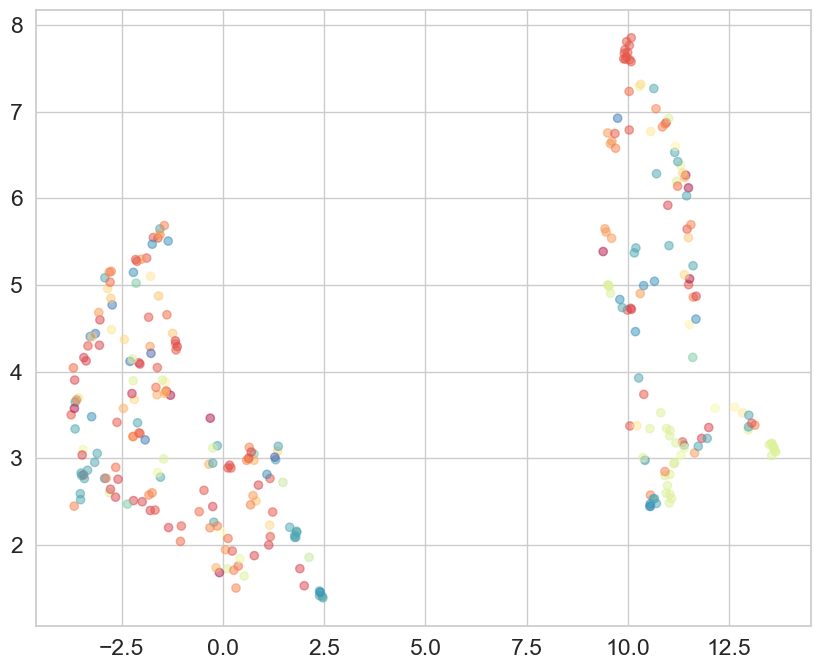

In [41]:
# Perform the same steps as before but using the v-gene label 
df["v_label"] = df["v_gene"].apply(lambda x: x.split("-")[0])
v_labels = []
v_encoder = LabelEncoder()
v_encoder = v_encoder.fit(df['v_label'].unique())
for k in tqdm(df.index):
    v_label = v_encoder.transform([df.loc[k,"v_label"]])
    v_labels.append(v_label)
v_labels = [int(y) for y in v_labels]
df["v_label"] = v_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["v_label"].nunique())
df["v_color"] = df["v_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['v_color'][:N], alpha=0.5)
plt.show()